In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import numpy as np

#### Wait to add the infectious disease until after FIPS codes get fixed.

In [2]:
# Reading in the infectious disease file. 

infect_disease = pd.read_csv(
    '../data/cleaned/Cleaned_Infectious_Diseases.csv',
        dtype = {'FIPS': object})

In [3]:
infect_disease

,Cause Name,County,FIPS,State,Sex,1980 Mortality Rate,1981 Mortality Rate,1982 Mortality Rate,1983 Mortality Rate,1984 Mortality Rate,1985 Mortality Rate,1986 Mortality Rate,1987 Mortality Rate,1988 Mortality Rate,1989 Mortality Rate,1990 Mortality Rate,1991 Mortality Rate,1992 Mortality Rate,1993 Mortality Rate,1994 Mortality Rate,1995 Mortality Rate,1996 Mortality Rate,1997 Mortality Rate,1998 Mortality Rate,1999 Mortality Rate,2000 Mortality Rate,2001 Mortality Rate,2002 Mortality Rate,2003 Mortality Rate,2004 Mortality Rate,2005 Mortality Rate,2006 Mortality Rate,2007 Mortality Rate,2008 Mortality Rate,2009 Mortality Rate,2010 Mortality Rate,2011 Mortality Rate,2012 Mortality Rate,2013 Mortality Rate,2014 Mortality Rate
0,Diarrheal diseases,Abbeville County,45001,South Carolina,Male,0.544780,0.527651,0.497634,0.494389,0.474931,0.471646,0.463874,0.464967,0.467078,0.461088,0.463935,0.465790,0.486971,0.507357,0.540485,0.581433,0.620667,0.654248,0.732117,0.888374,1.018996,1.133128,1.373117,1.463302,1.574434,1.781956,1.975768,1.990320,2.078172,2.127402,2.148729,2.214070,2.228700,2.103231,2.036498
1,HIV/AIDS,Abbeville County,45001,South Carolina,Male,0.000000,0.016880,0.032764,0.125363,0.368058,0.885443,1.829571,4.314054,5.970452,8.269497,9.520036,11.565191,13.461352,14.358659,17.457872,17.246634,11.900327,5.675472,4.508318,4.914642,4.770400,4.527584,4.694793,4.375139,4.077616,4.011418,4.158317,3.547588,3.241562,3.059407,2.648412,2.385768,2.311088,2.194328,2.274767
2,Hepatitis,Abbeville County,45001,South Carolina,Male,0.390525,0.391072,0.384045,0.415075,0.432983,0.472950,0.526218,0.601489,0.687544,0.761395,0.839450,0.945217,1.108435,1.228352,1.428589,1.701443,1.831401,1.854402,2.023274,2.155727,2.186766,2.144531,2.170971,1.847548,1.418573,1.024725,0.711098,0.534299,0.430361,0.374254,0.322069,0.293796,0.289048,0.289771,0.308139
3,Lower respiratory infections,Abbeville County,45001,South Carolina,Male,50.170282,49.795285,48.839716,50.553997,48.526771,49.551023,49.433246,49.555473,52.078802,51.052044,48.630431,49.296116,48.229255,47.363350,50.438650,52.421291,49.826964,46.604710,46.421128,45.526513,43.421506,42.776499,41.752396,39.551586,37.080112,35.337660,36.707576,33.422556,34.243425,33.131403,33.929873,33.340366,33.055923,32.367344,33.484107
4,Meningitis,Abbeville County,45001,South Carolina,Male,1.808849,1.773616,1.699353,1.694492,1.638841,1.648518,1.645027,1.639999,1.649606,1.588746,1.500257,1.422898,1.358262,1.310713,1.320206,1.302495,1.239461,1.125034,1.067781,0.995109,0.936018,0.883055,0.880453,0.821613,0.767287,0.743524,0.737747,0.701683,0.690704,0.665883,0.637855,0.618438,0.610886,0.592294,0.605268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33979,HIV/AIDS,Ziebach County,46137,South Dakota,Both,0.000000,0.004983,0.007144,0.019772,0.067387,0.191131,0.470434,1.360445,1.941968,3.003927,3.693242,4.741929,5.719227,6.662297,8.028613,8.285397,5.599193,2.616925,2.056217,2.375237,2.265554,2.174693,2.291760,2.203447,2.012656,1.959102,1.859152,1.788514,1.538357,1.458034,1.225894,1.038944,0.992253,0.952960,0.965302
33980,Hepatitis,Ziebach County,46137,South Dakota,Both,0.223500,0.215185,0.214821,0.218504,0.228849,0.247059,0.268798,0.297332,0.336673,0.379803,0.420725,0.467960,0.523450,0.613484,0.741576,0.888018,0.978091,1.058473,1.214723,1.288122,1.280959,1.283659,1.239398,1.029898,0.764263,0.507448,0.326480,0.244608,0.180228,0.149981,0.126812,0.112761,0.104364,0.106281,0.110551
33981,Lower respiratory infections,Ziebach County,46137,South Dakota,Both,49.687139,49.139397,48.486604,48.266510,48.643833,48.973878,49.529135,49.138008,49.938830,49.694295,49.249430,48.045599,48.744137,48.326554,49.814075,48.714436,47.873805,48.785826,47.070539,48.478404,47.319650,46.157802,47.590421,46.489465,44.911215,43.520685,42.476052,42.249565,41.539757,41.700291,39.255804,37.968280,37.431191,35.991783,34.674242
33982,Meningitis,Zie

In [4]:
# Reading in the physical activity and obesity prevalence data.

obesity_activity =pd.read_csv(
    '../data/cleaned/Cleaned_Obesity_Prevalence.csv', dtype = {'FIPS': object})

# Making the FIPS column lowcase to use better later. 
obesity_activity.rename(columns = {'FIPS':'fips'}, inplace = True)

In [5]:
obesity_activity

,fips,State,County,Sex,Outcome,Prevalence 2001 (%),Prevalence 2001 lower bound (%),Prevalence 2001 upper bound (%),Prevalence 2002 (%),Prevalence 2002 lower bound (%),Prevalence 2002 upper bound (%),Prevalence 2003 (%),Prevalence 2003 lower bound (%),Prevalence 2003 upper bound (%),Prevalence 2004 (%),Prevalence 2004 lower bound (%),Prevalence 2004 upper bound (%),Prevalence 2005 (%),Prevalence 2005 lower bound (%),Prevalence 2005 upper bound (%),Prevalence 2006 (%),Prevalence 2006 lower bound (%),Prevalence 2006 upper bound (%),Prevalence 2007 (%),Prevalence 2007 lower bound (%),Prevalence 2007 upper bound (%),Prevalence 2008 (%),Prevalence 2008 lower bound (%),Prevalence 2008 upper bound (%),Prevalence 2009 (%),Prevalence 2009 lower bound (%),Prevalence 2009 upper bound (%),Prevalence 2010 (%),Prevalence 2010 lower bound (%),Prevalence 2010 upper bound (%),Prevalence 2011 (%),Prevalence 2011 lower bound (%),Prevalence 2011 upper bound (%),Difference 2001 to 2009,Difference 2001 to 2009 lower bound,Difference 2001 to 2009 upper bound
0,01001,Alabama,"Autauga, AL",Male,Any PA,76.72,71.45,80.94,77.30,72.42,81.32,77.63,73.02,81.67,77.03,72.46,81.18,77.21,72.76,81.27,76.72,71.90,80.69,77.32,72.74,81.46,77.32,72.76,81.24,76.73,71.89,80.81,76.37,71.06,80.87,76.05,70.21,81.02,0.01,-6.70,6.75
1,01001,Alabama,"Autauga, AL",Female,Any PA,68.21,62.94,73.12,68.79,63.92,73.25,69.20,64.59,73.48,67.39,62.16,72.19,67.60,62.79,72.12,67.26,62.19,72.30,67.39,62.12,71.45,67.09,62.50,71.09,68.77,64.50,72.86,68.74,64.19,72.93,68.75,63.69,73.12,0.55,-6.32,6.91
2,01003,Alabama,"Baldwin, AL",Male,Any PA,73.90,69.75,78.34,74.41,70.39,78.57,74.87,70.95,78.84,75.67,71.86,79.16,75.10,71.19,78.58,77.02,73.60,80.47,78.02,74.58,81.04,79.51,76.53,82.36,78.33,75.56,81.16,78.04,74.96,81.10,77.69,74.17,81.13,4.43,-0.88,9.39
3,01003,Alabama,"Baldwin, AL",Female,Any PA,71.84,67.69,75.63,72.66,68.91,76.16,73.46,69.75,76.90,74.50,71.07,77.53,75.62,72.44,78.65,76.59,73.79,79.25,75.57,72.52,78.29,73.52,70.60,75.94,72.87,70.36,75.43,72.69,69.93,75.29,72.56,69.43,75.45,1.03,-3.59,6.10
4,01005,Alabama,"Barbour, AL",Male,Any PA,65.61,59.40,71.07,66.21,60.24,71.66,66.80,60.90,72.30,66.99,61.23,72.73,65.43,59.55,71.01,63.98,58.31,69.15,65.63,59.70,70.98,66.55,61.06,72.10,66.66,61.61,71.81,66.23,60.61,71.73,65.75,59.24,72.07,1.05,-6.94,9.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12567,56043,Wyoming,"Washakie, WY",Female,Obesity,24.87,21.58,28.78,25.83,22.44,30.07,26.40,22.98,30.77,27.18,23.52,31.58,29.38,25.50,33.66,31.01,26.73,34.68,32.10,27.48,35.90,32.93,27.77,36.81,33.90,28.34,37.91,34.44,28.89,38.42,34.67,28.77,38.99,9.03,2.24,13.64
12568,56045,Wyoming,"Weston, WY",Male,Obesity,27.03,22.69,31.80,27.81,23.54,32.57,28.69,24.49,33.44,30.26,25.96,35.31,31.41,27.19,36.15,32.93,29.10,37.68,34.32,30.10,39.30,35.03,30.86,40.60,35.75,31.16,41.44,36.31,31.70,42.00,36.82,32.04,42.64,8.72,2.68,15.44
12569,56045,Wyoming,"Weston, WY",Female,Obesity,28.43,23.58,31.32,29.12,24.21,32.17,30.02,25.05,33.26,31.14,26.12,34.83,33.39,28.25,36.77,34.67,29.76,37.90,35.05,30.04,38.73,35.80,30.69,39.89,34.98,29.54,39.34,35.32,29.90,39.62,35.90,30.32,40.30,6.55,0.94,13.04
12570,02911,Alaska,"Denali, AK",Male,Obesity,25.85,22.18,30.53,26.90,23.38,31.49,27.92,24.36,32.60,28.66,25.00,33.34,30.23,26.05,34.88,32.37,28.36,36.52,34.24,29.30,38.86,36.12,30.66,41.12,37.81,32.18,43.12,38.39,32.83,43.58,38.97,33.11,44.47,11.96,4.95,17.64


In [6]:
# Reading in the cardiovascular disease data.

cvd_df = pd.read_csv('../data/cleaned/cvd_mortality.zip', parse_dates=['year_id'], dtype={'FIPS': object})

In [7]:
cvd_df

,location_name,FIPS,cause_name,sex,year_id,mx
0,Beaverhead County,30001,Cardiovascular diseases,Male,1980-01-01,629.352118
1,Beaverhead County,30001,Cardiovascular diseases,Male,1981-01-01,622.091399
2,Beaverhead County,30001,Cardiovascular diseases,Male,1982-01-01,590.455653
3,Beaverhead County,30001,Cardiovascular diseases,Male,1983-01-01,573.687746
4,Beaverhead County,30001,Cardiovascular diseases,Male,1984-01-01,566.645135
...,...,...,...,...,...,...
4290190,Wyandot County,39175,Other cardiovascular and circulatory diseases,Both,2010-01-01,9.689966
4290191,Wyandot County,39175,Other cardiovascular and circulatory diseases,Both,2011-01-01,9.641477
4290192,Wyandot County,39175,Other cardiovascular and circulatory diseases,Both,2012-01-01,9.653720
4290193,Wyandot County,39175,Other cardiovascular and circulatory diseases,Both,2013-01-01,9.765255


In [8]:
cvd_df['cause_name'].unique()

array(['Cardiovascular diseases', 'Rheumatic heart disease',
       'Ischemic heart disease', 'Cerebrovascular disease',
       'Ischemic stroke', 'Hemorrhagic stroke',
       'Hypertensive heart disease', 'Cardiomyopathy and myocarditis',
       'Atrial fibrillation and flutter', 'Aortic aneurysm',
       'Peripheral vascular disease', 'Endocarditis',
       'Other cardiovascular and circulatory diseases'], dtype=object)

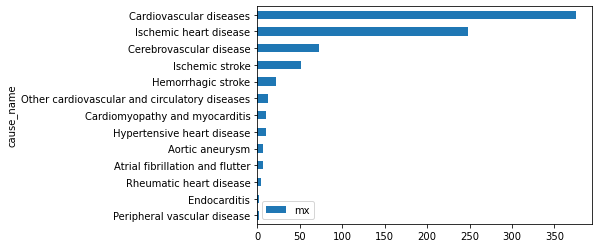

In [9]:
cvd_df[cvd_df['sex']== 'Both'].groupby(by= 'cause_name').mean().sort_values(by='mx', ascending = True).plot(kind = 'barh');

In [10]:
round(cvd_df[cvd_df['sex'] == 'Male'].describe(),3)

,mx
count,1430065.000
mean,77.833
std,148.427
min,0.516
25%,5.424
50%,13.045
75%,55.519
max,1363.427


In [11]:
round(cvd_df[cvd_df['sex'] == 'Female'].describe(),3)

,mx
count,1430065.000
mean,52.250
std,91.824
min,0.398
25%,3.775
50%,9.469
75%,50.787
max,665.019


In [12]:
# Reduce the data frame to look at the combined prevalance for both sexes.

cvd_df_both = cvd_df[cvd_df['sex'] == 'Both']
cvd_df_both

,location_name,FIPS,cause_name,sex,year_id,mx
70,Beaverhead County,30001,Cardiovascular diseases,Both,1980-01-01,445.466572
71,Beaverhead County,30001,Cardiovascular diseases,Both,1981-01-01,437.666231
72,Beaverhead County,30001,Cardiovascular diseases,Both,1982-01-01,419.543305
73,Beaverhead County,30001,Cardiovascular diseases,Both,1983-01-01,413.574026
74,Beaverhead County,30001,Cardiovascular diseases,Both,1984-01-01,408.961164
...,...,...,...,...,...,...
4290190,Wyandot County,39175,Other cardiovascular and circulatory diseases,Both,2010-01-01,9.689966
4290191,Wyandot County,39175,Other cardiovascular and circulatory diseases,Both,2011-01-01,9.641477
4290192,Wyandot County,39175,Other cardiovascular and circulatory diseases,Both,2012-01-01,9.653720
4290193,Wyandot County,39175,Other cardiovascular and circulatory diseases,Both,2013-01-01,9.765255


In [13]:
infect_disease['FIPS'].nunique()

1888

#### NEed to fix this!mm

In [14]:
# Group the infectious disease dataframe by county in order to grab the latest death rate.

infect_by_county = infect_disease.groupby(['FIPS'], as_index = False).mean()

In [15]:
infect_by_county

,FIPS,1980 Mortality Rate,1981 Mortality Rate,1982 Mortality Rate,1983 Mortality Rate,1984 Mortality Rate,1985 Mortality Rate,1986 Mortality Rate,1987 Mortality Rate,1988 Mortality Rate,1989 Mortality Rate,1990 Mortality Rate,1991 Mortality Rate,1992 Mortality Rate,1993 Mortality Rate,1994 Mortality Rate,1995 Mortality Rate,1996 Mortality Rate,1997 Mortality Rate,1998 Mortality Rate,1999 Mortality Rate,2000 Mortality Rate,2001 Mortality Rate,2002 Mortality Rate,2003 Mortality Rate,2004 Mortality Rate,2005 Mortality Rate,2006 Mortality Rate,2007 Mortality Rate,2008 Mortality Rate,2009 Mortality Rate,2010 Mortality Rate,2011 Mortality Rate,2012 Mortality Rate,2013 Mortality Rate,2014 Mortality Rate
0,00000,6.969860,6.909326,6.806139,6.926138,7.065896,7.326918,7.594053,8.088136,8.394584,8.718439,8.812201,9.045414,9.195217,9.506130,9.740536,9.754062,8.922001,7.932922,7.648947,7.630989,7.477967,7.334391,7.209381,7.012711,6.694702,6.527851,6.339851,6.128768,5.978991,5.841462,5.656877,5.605046,5.517700,5.484530,5.493991
1,00033,6.345981,6.172605,6.123522,6.212875,6.101053,6.147223,6.351248,6.310333,6.444139,6.211848,6.294893,6.387129,6.540712,6.594807,6.537890,6.463704,6.040774,5.730688,5.700259,5.565878,5.338858,5.261383,5.315672,5.117503,5.154047,5.020265,4.809211,4.609731,4.553610,4.436790,4.243687,4.363548,4.223915,4.176442,4.126661
2,00034,7.036690,6.972807,7.114323,7.257592,7.753288,8.039148,8.491062,9.442776,9.953138,10.310703,10.482919,10.800169,10.867912,11.342289,11.164294,11.413672,10.131402,8.621726,8.002776,9.150303,8.729632,8.558280,8.368881,7.949458,7.658792,7.333381,7.087374,6.836709,6.641581,6.487512,6.173351,6.215893,5.973926,6.060114,5.966085
3,00035,6.996365,6.845343,6.662660,6.828652,6.895385,6.936265,7.137537,7.186103,7.352956,7.513963,7.495393,7.791494,7.795098,8.128474,8.662924,8.327560,7.571902,7.036581,6.871220,6.939913,6.446321,6.599186,6.459922,6.147874,5.737045,5.638021,5.643451,5.301755,5.260098,5.224202,4.871792,4.936176,4.819925,4.727938,4.860622
4,00036,8.339525,7.906266,7.860293,8.231543,8.831104,9.357112,10.336061,11.848880,12.482663,13.283705,13.317065,13.358499,13.274297,13.641995,14.069103,14.120687,12.341866,9.926766,9.194217,9.827198,9.396316,9.031460,8.835894,8.476971,8.387942,8.013838,7.735315,7.326502,7.131601,6.921628,7.009002,6.907198,6.653574,6.529817,6.464260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,56037,7.155372,7.088146,7.027534,7.349978,7.323718,7.502643,7.743170,7.512835,7.890993,7.908086,7.885272,8.197465,8.341381,8.820937,8.781341,9.020327,8.480646,8.126816,8.277671,7.986164,7.724148,8.008116,8.099542,8.209687,7.517270,7.406858,7.539327,7.406841,7.120676,7.011630,6.711282,6.787807,6.768287,6.692672,6.975369
1884,56039,5.770003,5.741175,5.590327,5.714553,5.645787,5.671747,5.740804,5.716428,5.888929,5.819044,5.807816,5.862026,5.803481,5.992842,6.088888,6.062617,5.614412,5.278443,5.124251,5.039157,4.928209,4.748157,4.699224,4.679784,4.258211,4.156111,4.026289,3.936982,3.820111,3.702259,3.557629,3.487017,3.432169,3.420273,3.398748
1885,56041,7.207910,7.200949,7.049465,7.141387,7.273794,7.357355,7.429520,7.467886,7.637271,7.548623,7.525542,7.868802,7.963700,7.841645,8.160975,8.066700,7.713327,7.303509,7.042256,6.924943,6.779095,6.735155,6.778369,6.408605,5.992172,5.998686,5.777729,5.625558,5.611222,5.440844,5.253098,5.171180,5.171694,5.295356,5.404238
1886,56043,10.048416,10.006675,9.880066,10.317178,10.107728,10.506197,10.250664,10.682877,10.531757,10.456070,10.414495,10.547279,10.726494,10.875384,11.126904,11.339366,11.259801,10.365758,10.286304,10.776208,10.085402,9.841753,9.818272,9.472951,9.040966,8.920717,8.574785,8.125788,8.162961,7.809886,7.600439,7.662091,7.377220,7.640869,7.594143


In [16]:
# Grouping cvd by county in order to pick off columns of interest to combine to the obesity data and the demographic data.
# We're taking the mean prevalance of *any* cardiovascular disease cause of death.
# 'mx is the prevalence per 100,000.

cvd_by_county = cvd_df_both.groupby(['FIPS'], as_index=False).mean()

# Fixing the FIPS that got converted to numeric during the groupby; since we're grouping on FIPS the mean is just what we want.

cvd_by_county['fips'] = cvd_by_county['FIPS'].str.zfill(5)
cvd_by_county.rename(columns = {'mx': 'heart_disease_prev_100K'}, inplace = True)
cvd_by_county

# mx is the preva


,FIPS,heart_disease_prev_100K,fips
0,10001,67.393854,10001
1,10003,60.952073,10003
2,10005,62.173101,10005
3,1001,71.952925,01001
4,1003,58.781387,01003
...,...,...,...
3138,9007,52.366570,09007
3139,9009,55.985943,09009
3140,9011,56.146374,09011
3141,9013,54.917787,09013


In [17]:
# Pick off just the males obesity info for 2011.
obesity_males = obesity_activity[(obesity_activity['Outcome'] == 'Obesity') & (obesity_activity['Sex']=='Male')].copy()
obesity_males.set_index('fips', inplace = True)
obesity_males = obesity_males[['Prevalence 2011 lower bound (%)', 'Prevalence 2011 upper bound (%)']]
obesity_males.columns = ['male_2011_lower_bound_percent', 'male_2011_upper_bound_percent']

# Pick off just the females obesity info for 2011.
obesity_females = obesity_activity[(obesity_activity['Outcome'] == 'Obesity') & (obesity_activity['Sex']=='Female')].copy()
obesity_females.set_index('fips', inplace = True)
obesity_females = obesity_females[['Prevalence 2011 lower bound (%)', 'Prevalence 2011 upper bound (%)']]
obesity_females.columns = ['female_2011_lower_bound_percent', 'female_2011_upper_bound_percent']

obesity = pd.concat([obesity_females, obesity_males], axis = 1)
obesity

# Maybe later we'll take an average, maybe not.

,female_2011_lower_bound_percent,female_2011_upper_bound_percent,male_2011_lower_bound_percent,male_2011_upper_bound_percent
fips,,,,
01001,34.06,43.23,32.17,42.71
01003,29.93,36.74,29.93,38.63
01005,45.95,55.80,36.57,47.55
01007,39.55,49.36,35.44,46.52
01009,36.28,46.80,33.36,44.05
...,...,...,...,...
56039,16.71,22.53,18.62,25.12
56041,31.01,38.42,32.01,40.74
56043,28.77,38.99,27.34,37.71


In [18]:
obesity['average_2011_upper_bound_pct_obesity'] = obesity[['female_2011_upper_bound_percent', 'male_2011_upper_bound_percent']].mean(axis = 1)

In [19]:
obesity

,female_2011_lower_bound_percent,female_2011_upper_bound_percent,male_2011_lower_bound_percent,male_2011_upper_bound_percent,average_2011_upper_bound_pct_obesity
fips,,,,,
01001,34.06,43.23,32.17,42.71,42.970
01003,29.93,36.74,29.93,38.63,37.685
01005,45.95,55.80,36.57,47.55,51.675
01007,39.55,49.36,35.44,46.52,47.940
01009,36.28,46.80,33.36,44.05,45.425
...,...,...,...,...,...
56039,16.71,22.53,18.62,25.12,23.825
56041,31.01,38.42,32.01,40.74,39.580
56043,28.77,38.99,27.34,37.71,38.350


In [20]:
obesity = obesity[['average_2011_upper_bound_pct_obesity']]
obesity

,average_2011_upper_bound_pct_obesity
fips,
01001,42.970
01003,37.685
01005,51.675
01007,47.940
01009,45.425
...,...
56039,23.825
56041,39.580
56043,38.350


In [21]:
obesity = obesity[['average_2011_upper_bound_pct_obesity']]
obesity

,average_2011_upper_bound_pct_obesity
fips,
01001,42.970
01003,37.685
01005,51.675
01007,47.940
01009,45.425
...,...
56039,23.825
56041,39.580
56043,38.350


Need to drop the `merged_fips` where it is 02911. This is not a FIPS code in the ACS data that we read in elsewhere. We'll do that below.

In [22]:
demo_df = pd.read_csv(
    '../data/cleaned/final_demo.csv', 
    dtype = {'fips' : object}
)

#demo_df
demo_df.set_index('fips', inplace = True)
demo_df

,total_pop_age_sex,median_age,sex_ratio_males,under_18_percent,over_18_percent,over_65_percent,county,state,total_hh,median_hh_income,mean_hh_income,total_families,median_family_income,mean_family_income,tot_pop_race_ethnicity,tot_white,tot_black_af_am,tot_aminalnat,tot_asian,tot_hawopi,total_pop_poverty,pop_below_poverty,percent_below_poverty,smoking_ban_2010,asian_2019,avg_family_size_2019,black_2019,hispanic_2019,household_has_broadband_2019,household_has_computer_2019,household_has_smartphone_2019,households_2019,households_speak_limited_english_2019,housing_mobile_homes_2019,hs_grad_2019,median_household_income_2019,median_individual_income_2019,native_2019,other_single_race_2019,pac_isl_2019,persons_per_household_2019,pop_2019,unemployment_rate_2019,uninsured_2019,veterans_2019,white_2019,white_not_hispanic_2019,rural_urban_continuum_code_2013,Metro2013,retirement_destination_2015_update,metro_adjacent_2013
fips,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01001,55380.0,38.2,94.7,23.8,76.2,15.0,Autauga County,Alabama,21397.0,58731.0,75326.0,15076.0,71103.0,87094.0,55380.0,42527.0,10538.0,140.0,573.0,26.0,54922.0,8340.0,15.2,none,1.0,3.09,19.0,2.8,80.6,73.0,78.4,21397.0,0.7,26.7,88.5,58731.0,29725.0,0.3,0.7,0.0,2.56,55380.0,3.5,7.1,12.6,76.8,74.6,2.0,1.0,1.0,0.0
01003,212830.0,43.0,94.7,21.7,78.3,20.0,Baldwin County,Alabama,80930.0,58320.0,80986.0,53467.0,75850.0,97991.0,212830.0,183471.0,19718.0,1645.0,1969.0,9.0,209618.0,21704.0,10.4,none,0.9,3.24,9.3,4.6,81.8,76.3,81.7,80930.0,1.2,24.8,90.8,58320.0,29802.0,0.8,1.1,0.0,2.59,212830.0,4.0,8.9,11.8,86.2,83.1,3.0,1.0,1.0,0.0
01005,25361.0,40.4,112.4,20.9,79.1,18.6,Barbour County,Alabama,9345.0,32525.0,47068.0,6187.0,41704.0,56374.0,25361.0,11869.0,12066.0,82.0,134.0,1.0,22417.0,6875.0,30.7,partial,0.5,3.01,47.6,4.4,60.5,51.9,64.2,9345.0,1.6,39.1,73.2,32525.0,17963.0,0.3,3.6,0.0,2.41,25361.0,9.4,11.3,6.6,46.8,45.8,6.0,0.0,0.0,1.0
01007,22493.0,40.9,117.5,20.6,79.4,15.9,Bibb County,Alabama,6891.0,47542.0,60182.0,4789.0,57891.0,69316.0,22493.0,17272.0,5014.0,30.0,27.0,0.0,20632.0,3740.0,18.1,none,0.1,3.74,22.3,2.6,69.2,54.7,66.6,6891.0,0.6,25.6,79.1,47542.0,21958.0,0.1,0.0,0.0,2.99,22493.0,7.0,10.7,8.0,76.8,74.5,1.0,1.0,0.0,0.0
01009,57681.0,40.7,97.6,23.2,76.8,17.9,Blount County,Alabama,20847.0,49358.0,65639.0,14874.0,62295.0,76547.0,57681.0,55062.0,928.0,46.0,212.0,25.0,57108.0,7739.0,13.6,none,0.4,3.33,1.6,9.3,73.0,63.5,70.1,20847.0,1.8,21.2,80.5,49358.0,26976.0,0.1,0.9,0.0,2.74,57681.0,3.1,10.8,7.7,95.5,86.9,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,43521.0,35.3,106.8,26.5,73.5,11.4,Sweetwater County,Wyoming,15523.0,74843.0,85346.0,10794.0,87906.0,97459.0,43521.0,40642.0,502.0,508.0,340.0,19.0,42958.0,4921.0,11.5,none,0.8,3.32,1.2,15.9,84.0,81.9,83.4,15523.0,1.9,23.8,92.8,74843.0,36512.0,1.2,1.2,0.0,2.77,43521.0,5.7,11.3,8.6,93.4,79.6,5.0,0.0,0.0,0.0
56039,23280.0,39.3,112.5,19.1,80.9,14.0,Teton County,Wyoming,9019.0,84678.0,132531.0,5190.0,110667.0,172024.0,23280.0,20785.0,290.0,77.0,291.0,29.0,23188.0,1426.0,6.1,partial,1.3,3.01,1.2,15.0,87.1,90.1,85.3,9019.0,5.7,39.6,95.2,84678.0,40914.0,0.3,7.1,0.1,2.47,23280.0,0.7,12.7,5.3,89.3,81.3,7.0,0.0,0.0,0.0
56041,20479.0,35.8,103.3,29.2,70.8,13.0,Uinta County,Wyoming,7597.0,63403.0,74938.0,5313.0,77725.0,86265.0,20479.0,19132.0,23.0,145.0,32.0,0.0,20259.0,2298.0,11.3,none,0.2,3.23,0.1,9.1,89.5,80.3,84.8,7597.0,0.6,22.9,92.7,63403.0,29557.0,0.7,2.1,0.0,2.66,20479.0,5.5,11.2,7.4,93.4,87.5,7.0,0.0,0.0,0.0


In [23]:
# Checking to see what comes up when looking on `Denali` on the demographic dataframe and it's not FIPS 02911. So we'll drop it.
demo_df[demo_df['county'].str.contains('Denali')]

,total_pop_age_sex,median_age,sex_ratio_males,under_18_percent,over_18_percent,over_65_percent,county,state,total_hh,median_hh_income,mean_hh_income,total_families,median_family_income,mean_family_income,tot_pop_race_ethnicity,tot_white,tot_black_af_am,tot_aminalnat,tot_asian,tot_hawopi,total_pop_poverty,pop_below_poverty,percent_below_poverty,smoking_ban_2010,asian_2019,avg_family_size_2019,black_2019,hispanic_2019,household_has_broadband_2019,household_has_computer_2019,household_has_smartphone_2019,households_2019,households_speak_limited_english_2019,housing_mobile_homes_2019,hs_grad_2019,median_household_income_2019,median_individual_income_2019,native_2019,other_single_race_2019,pac_isl_2019,persons_per_household_2019,pop_2019,unemployment_rate_2019,uninsured_2019,veterans_2019,white_2019,white_not_hispanic_2019,rural_urban_continuum_code_2013,Metro2013,retirement_destination_2015_update,metro_adjacent_2013
fips,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
02068,2246.0,42.1,114.9,11.6,88.4,9.3,Denali Borough,Alaska,613.0,81719.0,85694.0,321.0,104375.0,107659.0,2246.0,1892.0,26.0,49.0,58.0,0.0,2170.0,354.0,16.3,none,2.6,3.12,1.2,0.3,89.9,91.5,79.8,613.0,0.0,18.4,98.5,81719.0,26630.0,2.2,0.2,0.0,2.32,2246.0,1.1,18.5,6.9,84.2,84.2,8.0,0.0,0.0,1.0


In [24]:
obesity

,average_2011_upper_bound_pct_obesity
fips,
01001,42.970
01003,37.685
01005,51.675
01007,47.940
01009,45.425
...,...
56039,23.825
56041,39.580
56043,38.350


In [25]:
obesity.drop(index = '02911', inplace = True)

In [26]:
demo_df

,total_pop_age_sex,median_age,sex_ratio_males,under_18_percent,over_18_percent,over_65_percent,county,state,total_hh,median_hh_income,mean_hh_income,total_families,median_family_income,mean_family_income,tot_pop_race_ethnicity,tot_white,tot_black_af_am,tot_aminalnat,tot_asian,tot_hawopi,total_pop_poverty,pop_below_poverty,percent_below_poverty,smoking_ban_2010,asian_2019,avg_family_size_2019,black_2019,hispanic_2019,household_has_broadband_2019,household_has_computer_2019,household_has_smartphone_2019,households_2019,households_speak_limited_english_2019,housing_mobile_homes_2019,hs_grad_2019,median_household_income_2019,median_individual_income_2019,native_2019,other_single_race_2019,pac_isl_2019,persons_per_household_2019,pop_2019,unemployment_rate_2019,uninsured_2019,veterans_2019,white_2019,white_not_hispanic_2019,rural_urban_continuum_code_2013,Metro2013,retirement_destination_2015_update,metro_adjacent_2013
fips,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01001,55380.0,38.2,94.7,23.8,76.2,15.0,Autauga County,Alabama,21397.0,58731.0,75326.0,15076.0,71103.0,87094.0,55380.0,42527.0,10538.0,140.0,573.0,26.0,54922.0,8340.0,15.2,none,1.0,3.09,19.0,2.8,80.6,73.0,78.4,21397.0,0.7,26.7,88.5,58731.0,29725.0,0.3,0.7,0.0,2.56,55380.0,3.5,7.1,12.6,76.8,74.6,2.0,1.0,1.0,0.0
01003,212830.0,43.0,94.7,21.7,78.3,20.0,Baldwin County,Alabama,80930.0,58320.0,80986.0,53467.0,75850.0,97991.0,212830.0,183471.0,19718.0,1645.0,1969.0,9.0,209618.0,21704.0,10.4,none,0.9,3.24,9.3,4.6,81.8,76.3,81.7,80930.0,1.2,24.8,90.8,58320.0,29802.0,0.8,1.1,0.0,2.59,212830.0,4.0,8.9,11.8,86.2,83.1,3.0,1.0,1.0,0.0
01005,25361.0,40.4,112.4,20.9,79.1,18.6,Barbour County,Alabama,9345.0,32525.0,47068.0,6187.0,41704.0,56374.0,25361.0,11869.0,12066.0,82.0,134.0,1.0,22417.0,6875.0,30.7,partial,0.5,3.01,47.6,4.4,60.5,51.9,64.2,9345.0,1.6,39.1,73.2,32525.0,17963.0,0.3,3.6,0.0,2.41,25361.0,9.4,11.3,6.6,46.8,45.8,6.0,0.0,0.0,1.0
01007,22493.0,40.9,117.5,20.6,79.4,15.9,Bibb County,Alabama,6891.0,47542.0,60182.0,4789.0,57891.0,69316.0,22493.0,17272.0,5014.0,30.0,27.0,0.0,20632.0,3740.0,18.1,none,0.1,3.74,22.3,2.6,69.2,54.7,66.6,6891.0,0.6,25.6,79.1,47542.0,21958.0,0.1,0.0,0.0,2.99,22493.0,7.0,10.7,8.0,76.8,74.5,1.0,1.0,0.0,0.0
01009,57681.0,40.7,97.6,23.2,76.8,17.9,Blount County,Alabama,20847.0,49358.0,65639.0,14874.0,62295.0,76547.0,57681.0,55062.0,928.0,46.0,212.0,25.0,57108.0,7739.0,13.6,none,0.4,3.33,1.6,9.3,73.0,63.5,70.1,20847.0,1.8,21.2,80.5,49358.0,26976.0,0.1,0.9,0.0,2.74,57681.0,3.1,10.8,7.7,95.5,86.9,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,43521.0,35.3,106.8,26.5,73.5,11.4,Sweetwater County,Wyoming,15523.0,74843.0,85346.0,10794.0,87906.0,97459.0,43521.0,40642.0,502.0,508.0,340.0,19.0,42958.0,4921.0,11.5,none,0.8,3.32,1.2,15.9,84.0,81.9,83.4,15523.0,1.9,23.8,92.8,74843.0,36512.0,1.2,1.2,0.0,2.77,43521.0,5.7,11.3,8.6,93.4,79.6,5.0,0.0,0.0,0.0
56039,23280.0,39.3,112.5,19.1,80.9,14.0,Teton County,Wyoming,9019.0,84678.0,132531.0,5190.0,110667.0,172024.0,23280.0,20785.0,290.0,77.0,291.0,29.0,23188.0,1426.0,6.1,partial,1.3,3.01,1.2,15.0,87.1,90.1,85.3,9019.0,5.7,39.6,95.2,84678.0,40914.0,0.3,7.1,0.1,2.47,23280.0,0.7,12.7,5.3,89.3,81.3,7.0,0.0,0.0,0.0
56041,20479.0,35.8,103.3,29.2,70.8,13.0,Uinta County,Wyoming,7597.0,63403.0,74938.0,5313.0,77725.0,86265.0,20479.0,19132.0,23.0,145.0,32.0,0.0,20259.0,2298.0,11.3,none,0.2,3.23,0.1,9.1,89.5,80.3,84.8,7597.0,0.6,22.9,92.7,63403.0,29557.0,0.7,2.1,0.0,2.66,20479.0,5.5,11.2,7.4,93.4,87.5,7.0,0.0,0.0,0.0


In [27]:
demo_obesity = pd.merge(left = demo_df, right = obesity, on='fips')
demo_obesity

,total_pop_age_sex,median_age,sex_ratio_males,under_18_percent,over_18_percent,over_65_percent,county,state,total_hh,median_hh_income,mean_hh_income,total_families,median_family_income,mean_family_income,tot_pop_race_ethnicity,tot_white,tot_black_af_am,tot_aminalnat,tot_asian,tot_hawopi,total_pop_poverty,pop_below_poverty,percent_below_poverty,smoking_ban_2010,asian_2019,avg_family_size_2019,black_2019,hispanic_2019,household_has_broadband_2019,household_has_computer_2019,household_has_smartphone_2019,households_2019,households_speak_limited_english_2019,housing_mobile_homes_2019,hs_grad_2019,median_household_income_2019,median_individual_income_2019,native_2019,other_single_race_2019,pac_isl_2019,persons_per_household_2019,pop_2019,unemployment_rate_2019,uninsured_2019,veterans_2019,white_2019,white_not_hispanic_2019,rural_urban_continuum_code_2013,Metro2013,retirement_destination_2015_update,metro_adjacent_2013,average_2011_upper_bound_pct_obesity
fips,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01001,55380.0,38.2,94.7,23.8,76.2,15.0,Autauga County,Alabama,21397.0,58731.0,75326.0,15076.0,71103.0,87094.0,55380.0,42527.0,10538.0,140.0,573.0,26.0,54922.0,8340.0,15.2,none,1.0,3.09,19.0,2.8,80.6,73.0,78.4,21397.0,0.7,26.7,88.5,58731.0,29725.0,0.3,0.7,0.0,2.56,55380.0,3.5,7.1,12.6,76.8,74.6,2.0,1.0,1.0,0.0,42.970
01003,212830.0,43.0,94.7,21.7,78.3,20.0,Baldwin County,Alabama,80930.0,58320.0,80986.0,53467.0,75850.0,97991.0,212830.0,183471.0,19718.0,1645.0,1969.0,9.0,209618.0,21704.0,10.4,none,0.9,3.24,9.3,4.6,81.8,76.3,81.7,80930.0,1.2,24.8,90.8,58320.0,29802.0,0.8,1.1,0.0,2.59,212830.0,4.0,8.9,11.8,86.2,83.1,3.0,1.0,1.0,0.0,37.685
01005,25361.0,40.4,112.4,20.9,79.1,18.6,Barbour County,Alabama,9345.0,32525.0,47068.0,6187.0,41704.0,56374.0,25361.0,11869.0,12066.0,82.0,134.0,1.0,22417.0,6875.0,30.7,partial,0.5,3.01,47.6,4.4,60.5,51.9,64.2,9345.0,1.6,39.1,73.2,32525.0,17963.0,0.3,3.6,0.0,2.41,25361.0,9.4,11.3,6.6,46.8,45.8,6.0,0.0,0.0,1.0,51.675
01007,22493.0,40.9,117.5,20.6,79.4,15.9,Bibb County,Alabama,6891.0,47542.0,60182.0,4789.0,57891.0,69316.0,22493.0,17272.0,5014.0,30.0,27.0,0.0,20632.0,3740.0,18.1,none,0.1,3.74,22.3,2.6,69.2,54.7,66.6,6891.0,0.6,25.6,79.1,47542.0,21958.0,0.1,0.0,0.0,2.99,22493.0,7.0,10.7,8.0,76.8,74.5,1.0,1.0,0.0,0.0,47.940
01009,57681.0,40.7,97.6,23.2,76.8,17.9,Blount County,Alabama,20847.0,49358.0,65639.0,14874.0,62295.0,76547.0,57681.0,55062.0,928.0,46.0,212.0,25.0,57108.0,7739.0,13.6,none,0.4,3.33,1.6,9.3,73.0,63.5,70.1,20847.0,1.8,21.2,80.5,49358.0,26976.0,0.1,0.9,0.0,2.74,57681.0,3.1,10.8,7.7,95.5,86.9,1.0,1.0,0.0,0.0,45.425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,43521.0,35.3,106.8,26.5,73.5,11.4,Sweetwater County,Wyoming,15523.0,74843.0,85346.0,10794.0,87906.0,97459.0,43521.0,40642.0,502.0,508.0,340.0,19.0,42958.0,4921.0,11.5,none,0.8,3.32,1.2,15.9,84.0,81.9,83.4,15523.0,1.9,23.8,92.8,74843.0,36512.0,1.2,1.2,0.0,2.77,43521.0,5.7,11.3,8.6,93.4,79.6,5.0,0.0,0.0,0.0,39.170
56039,23280.0,39.3,112.5,19.1,80.9,14.0,Teton County,Wyoming,9019.0,84678.0,132531.0,5190.0,110667.0,172024.0,23280.0,20785.0,290.0,77.0,291.0,29.0,23188.0,1426.0,6.1,partial,1.3,3.01,1.2,15.0,87.1,90.1,85.3,9019.0,5.7,39.6,95.2,84678.0,40914.0,0.3,7.1,0.1,2.47,23280.0,0.7,12.7,5.3,89.3,81.3,7.0,0.0,0.0,0.0,23.825
56041,20479.0,35.8,103.3,29.2,70.8,13.0,Uinta County,Wyoming,7597.0,63403.0,74938.0,5313.0,77725.0,86265.0,20479.0,19132.0,23.0,145.0,32.0,0.0,20259.0,2298.0,11.3,none,0.2,3.23,0.1,9.1,89.5,80.3,84.8,7597.0,0.6,22.9,92.7,63403.0,29557.0,0.7,2.1,0.0,2.66,20479.0,5.5,11.2,7.4,93.4,87.5,7.0,0.0,0.0,0.0,39.580


In [28]:
cvd_by_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FIPS                     3143 non-null   object 
 1   heart_disease_prev_100K  3143 non-null   float64
 2   fips                     3143 non-null   object 
dtypes: float64(1), object(2)
memory usage: 73.8+ KB


In [29]:
demo_obesity_cvd = pd.merge(left = demo_obesity, right = cvd_by_county, on = 'fips')
demo_obesity_cvd

,fips,total_pop_age_sex,median_age,sex_ratio_males,under_18_percent,over_18_percent,over_65_percent,county,state,total_hh,median_hh_income,mean_hh_income,total_families,median_family_income,mean_family_income,tot_pop_race_ethnicity,tot_white,tot_black_af_am,tot_aminalnat,tot_asian,tot_hawopi,total_pop_poverty,pop_below_poverty,percent_below_poverty,smoking_ban_2010,asian_2019,avg_family_size_2019,black_2019,hispanic_2019,household_has_broadband_2019,household_has_computer_2019,household_has_smartphone_2019,households_2019,households_speak_limited_english_2019,housing_mobile_homes_2019,hs_grad_2019,median_household_income_2019,median_individual_income_2019,native_2019,other_single_race_2019,pac_isl_2019,persons_per_household_2019,pop_2019,unemployment_rate_2019,uninsured_2019,veterans_2019,white_2019,white_not_hispanic_2019,rural_urban_continuum_code_2013,Metro2013,retirement_destination_2015_update,metro_adjacent_2013,average_2011_upper_bound_pct_obesity,FIPS,heart_disease_prev_100K
0,01001,55380.0,38.2,94.7,23.8,76.2,15.0,Autauga County,Alabama,21397.0,58731.0,75326.0,15076.0,71103.0,87094.0,55380.0,42527.0,10538.0,140.0,573.0,26.0,54922.0,8340.0,15.2,none,1.0,3.09,19.0,2.8,80.6,73.0,78.4,21397.0,0.7,26.7,88.5,58731.0,29725.0,0.3,0.7,0.0,2.56,55380.0,3.5,7.1,12.6,76.8,74.6,2.0,1.0,1.0,0.0,42.970,1001,71.952925
1,01003,212830.0,43.0,94.7,21.7,78.3,20.0,Baldwin County,Alabama,80930.0,58320.0,80986.0,53467.0,75850.0,97991.0,212830.0,183471.0,19718.0,1645.0,1969.0,9.0,209618.0,21704.0,10.4,none,0.9,3.24,9.3,4.6,81.8,76.3,81.7,80930.0,1.2,24.8,90.8,58320.0,29802.0,0.8,1.1,0.0,2.59,212830.0,4.0,8.9,11.8,86.2,83.1,3.0,1.0,1.0,0.0,37.685,1003,58.781387
2,01005,25361.0,40.4,112.4,20.9,79.1,18.6,Barbour County,Alabama,9345.0,32525.0,47068.0,6187.0,41704.0,56374.0,25361.0,11869.0,12066.0,82.0,134.0,1.0,22417.0,6875.0,30.7,partial,0.5,3.01,47.6,4.4,60.5,51.9,64.2,9345.0,1.6,39.1,73.2,32525.0,17963.0,0.3,3.6,0.0,2.41,25361.0,9.4,11.3,6.6,46.8,45.8,6.0,0.0,0.0,1.0,51.675,1005,63.554734
3,01007,22493.0,40.9,117.5,20.6,79.4,15.9,Bibb County,Alabama,6891.0,47542.0,60182.0,4789.0,57891.0,69316.0,22493.0,17272.0,5014.0,30.0,27.0,0.0,20632.0,3740.0,18.1,none,0.1,3.74,22.3,2.6,69.2,54.7,66.6,6891.0,0.6,25.6,79.1,47542.0,21958.0,0.1,0.0,0.0,2.99,22493.0,7.0,10.7,8.0,76.8,74.5,1.0,1.0,0.0,0.0,47.940,1007,79.901207
4,01009,57681.0,40.7,97.6,23.2,76.8,17.9,Blount County,Alabama,20847.0,49358.0,65639.0,14874.0,62295.0,76547.0,57681.0,55062.0,928.0,46.0,212.0,25.0,57108.0,7739.0,13.6,none,0.4,3.33,1.6,9.3,73.0,63.5,70.1,20847.0,1.8,21.2,80.5,49358.0,26976.0,0.1,0.9,0.0,2.74,57681.0,3.1,10.8,7.7,95.5,86.9,1.0,1.0,0.0,0.0,45.425,1009,65.344687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,56037,43521.0,35.3,106.8,26.5,73.5,11.4,Sweetwater County,Wyoming,15523.0,74843.0,85346.0,10794.0,87906.0,97459.0,43521.0,40642.0,502.0,508.0,340.0,19.0,42958.0,4921.0,11.5,none,0.8,3.32,1.2,15.9,84.0,81.9,83.4,15523.0,1.9,23.8,92.8,74843.0,36512.0,1.2,1.2,0.0,2.77,43521.0,5.7,11.3,8.6,93.4,79.6,5.0,0.0,0.0,0.0,39.170,56037,57.186138
3128,56039,23280.0,39.3,112.5,19.1,80.9,14.0,Teton County,Wyoming,9019.0,84678.0,132531.0,5190.0,110667.0,172024.0,23280.0,20785.0,290.0,77.0,291.0,29.0,23188.0,1426.0,6.1,partial,1.3,3.01,1.2,15.0,87.1,90.1,85.3,9019.0,5.7,39.6,95.2,84678.0,40914.0,0.3,7.1,0.1,2.47,23280.0,0.7,12.7,5.3,89.3,81.3,7.0,0.0,0.0,0.0,23.825,56039,41.840714
3129,56041,20479.0,35.8,103.3,29.2,70.8,13.0,Uinta County,Wyoming,7597.0,63403.0,74938.0,5313.0,77725.0,86265.0,20479.0,19132.0,23.0,145.0,32.0,0.0,20259.0,2298.0,11.3,none,0.2,3.23,0.1,9.1,89.5,80.3,84.8,7597.0,0.6,22.9,92.7,63403.0,29557.0,0.7,2.1,0.0,2.66,20479.0,5.5,11.2,7.4,93.4,87.5,7.0,0.0,0.0,0.0,39.580,56041,53.049534
3130,56043,8027.0,42.9,102.6,24.6,75.4,21.1,Washakie County,Wyoming,3365.0,54158.0,65496.0,2191.0,68265.0

#### Looks like we lost about ten counties. Not that important for what we're doing.

In [30]:
demo_obesity_cvd.to_csv(
    '../data/cleaned/final_combined.csv',
    index = False
)

In [31]:
test_df = pd.read_csv(
    '../data/cleaned/final_combined.csv',
    dtype = {'fips':object}
)
test_df

,fips,total_pop_age_sex,median_age,sex_ratio_males,under_18_percent,over_18_percent,over_65_percent,county,state,total_hh,median_hh_income,mean_hh_income,total_families,median_family_income,mean_family_income,tot_pop_race_ethnicity,tot_white,tot_black_af_am,tot_aminalnat,tot_asian,tot_hawopi,total_pop_poverty,pop_below_poverty,percent_below_poverty,smoking_ban_2010,asian_2019,avg_family_size_2019,black_2019,hispanic_2019,household_has_broadband_2019,household_has_computer_2019,household_has_smartphone_2019,households_2019,households_speak_limited_english_2019,housing_mobile_homes_2019,hs_grad_2019,median_household_income_2019,median_individual_income_2019,native_2019,other_single_race_2019,pac_isl_2019,persons_per_household_2019,pop_2019,unemployment_rate_2019,uninsured_2019,veterans_2019,white_2019,white_not_hispanic_2019,rural_urban_continuum_code_2013,Metro2013,retirement_destination_2015_update,metro_adjacent_2013,average_2011_upper_bound_pct_obesity,FIPS,heart_disease_prev_100K
0,01001,55380.0,38.2,94.7,23.8,76.2,15.0,Autauga County,Alabama,21397.0,58731.0,75326.0,15076.0,71103.0,87094.0,55380.0,42527.0,10538.0,140.0,573.0,26.0,54922.0,8340.0,15.2,none,1.0,3.09,19.0,2.8,80.6,73.0,78.4,21397.0,0.7,26.7,88.5,58731.0,29725.0,0.3,0.7,0.0,2.56,55380.0,3.5,7.1,12.6,76.8,74.6,2.0,1.0,1.0,0.0,42.970,1001,71.952925
1,01003,212830.0,43.0,94.7,21.7,78.3,20.0,Baldwin County,Alabama,80930.0,58320.0,80986.0,53467.0,75850.0,97991.0,212830.0,183471.0,19718.0,1645.0,1969.0,9.0,209618.0,21704.0,10.4,none,0.9,3.24,9.3,4.6,81.8,76.3,81.7,80930.0,1.2,24.8,90.8,58320.0,29802.0,0.8,1.1,0.0,2.59,212830.0,4.0,8.9,11.8,86.2,83.1,3.0,1.0,1.0,0.0,37.685,1003,58.781387
2,01005,25361.0,40.4,112.4,20.9,79.1,18.6,Barbour County,Alabama,9345.0,32525.0,47068.0,6187.0,41704.0,56374.0,25361.0,11869.0,12066.0,82.0,134.0,1.0,22417.0,6875.0,30.7,partial,0.5,3.01,47.6,4.4,60.5,51.9,64.2,9345.0,1.6,39.1,73.2,32525.0,17963.0,0.3,3.6,0.0,2.41,25361.0,9.4,11.3,6.6,46.8,45.8,6.0,0.0,0.0,1.0,51.675,1005,63.554734
3,01007,22493.0,40.9,117.5,20.6,79.4,15.9,Bibb County,Alabama,6891.0,47542.0,60182.0,4789.0,57891.0,69316.0,22493.0,17272.0,5014.0,30.0,27.0,0.0,20632.0,3740.0,18.1,none,0.1,3.74,22.3,2.6,69.2,54.7,66.6,6891.0,0.6,25.6,79.1,47542.0,21958.0,0.1,0.0,0.0,2.99,22493.0,7.0,10.7,8.0,76.8,74.5,1.0,1.0,0.0,0.0,47.940,1007,79.901207
4,01009,57681.0,40.7,97.6,23.2,76.8,17.9,Blount County,Alabama,20847.0,49358.0,65639.0,14874.0,62295.0,76547.0,57681.0,55062.0,928.0,46.0,212.0,25.0,57108.0,7739.0,13.6,none,0.4,3.33,1.6,9.3,73.0,63.5,70.1,20847.0,1.8,21.2,80.5,49358.0,26976.0,0.1,0.9,0.0,2.74,57681.0,3.1,10.8,7.7,95.5,86.9,1.0,1.0,0.0,0.0,45.425,1009,65.344687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,56037,43521.0,35.3,106.8,26.5,73.5,11.4,Sweetwater County,Wyoming,15523.0,74843.0,85346.0,10794.0,87906.0,97459.0,43521.0,40642.0,502.0,508.0,340.0,19.0,42958.0,4921.0,11.5,none,0.8,3.32,1.2,15.9,84.0,81.9,83.4,15523.0,1.9,23.8,92.8,74843.0,36512.0,1.2,1.2,0.0,2.77,43521.0,5.7,11.3,8.6,93.4,79.6,5.0,0.0,0.0,0.0,39.170,56037,57.186138
3128,56039,23280.0,39.3,112.5,19.1,80.9,14.0,Teton County,Wyoming,9019.0,84678.0,132531.0,5190.0,110667.0,172024.0,23280.0,20785.0,290.0,77.0,291.0,29.0,23188.0,1426.0,6.1,partial,1.3,3.01,1.2,15.0,87.1,90.1,85.3,9019.0,5.7,39.6,95.2,84678.0,40914.0,0.3,7.1,0.1,2.47,23280.0,0.7,12.7,5.3,89.3,81.3,7.0,0.0,0.0,0.0,23.825,56039,41.840714
3129,56041,20479.0,35.8,103.3,29.2,70.8,13.0,Uinta County,Wyoming,7597.0,63403.0,74938.0,5313.0,77725.0,86265.0,20479.0,19132.0,23.0,145.0,32.0,0.0,20259.0,2298.0,11.3,none,0.2,3.23,0.1,9.1,89.5,80.3,84.8,7597.0,0.6,22.9,92.7,63403.0,29557.0,0.7,2.1,0.0,2.66,20479.0,5.5,11.2,7.4,93.4,87.5,7.0,0.0,0.0,0.0,39.580,56041,53.049534
3130,56043,8027.0,42.9,102.6,24.6,75.4,21.1,Washakie County,Wyoming,3365.0,54158.0,65496.0,2191.0,68265.0

##### Looks like it works and is ready to be read in to the modeling notebook.